# Video Game Sales Analysis

## Data Overview

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. (https://www.kaggle.com/gregorut/videogamesales)

## Research Question:
    1)What are top 5 genres of high global sales?
    2)What are top 5 Publisher of high global sales?
    3)What are top 5 Platform of high global sales?
    4)Which 5 year of range from 1980 - 2020 has the highest global sales?
    5)What is the relationship between Top 5 Platforms and years ?
    6)What is the relationship between sales numbers in 4 different main regions from 1980 - 2020?
    7)Among "Gerne", "Publisher", "year", and "Platform", which variable affected high global sales the most?

## Data Wrangling

### Gather

In [233]:
# all packages that will use to analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings 
warnings.simplefilter('ignore')

In [234]:
# load Data
df = pd.read_csv('vgsales.csv')

### Assess

In [235]:
# view col and first 6 row data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [236]:
# display dims to data
df.shape

(16598, 11)

In [237]:
# stats for numerical data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [238]:
# give description for data type and number of non-null for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [239]:
sorted(list(df.Year.unique()))

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 nan,
 2016.0,
 2017.0,
 2020.0]

In [240]:
# find number for each Genres
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [241]:
df['Global_Sales'].min()

0.01

In [242]:
test = df[df['Global_Sales']>.01]
test[test['Global_Sales'] != test['NA_Sales']+test['EU_Sales']+test['JP_Sales']+test['Other_Sales']].shape[0]

6761

In [243]:
df[df.duplicated()].shape[0]

0

There is no duplicated row in data set

## Assessment report:
### Quality issues
<ul> 
    <li> Missing values in 'Year', 'Publisher' </li>
    <li> 6761 rows have wrong Global_Sales numbers </li>
</ul>

## clean

**Missing values in 'Year', 'Publisher'**

**Define: delete data without year and publisher because there is not many of them without those data.**

In [244]:
df_copy = df.copy()

In [245]:
df_copy.dropna(axis=0,how='any',inplace=True)

In [246]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


__6761 rows have wrong Global_Sales numbers__

__Define: Add up 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' and save them into 'Global_Sales' column__

In [247]:
df_copy['Global_Sales'] = df_copy['NA_Sales'] + df_copy['EU_Sales'] + df_copy['JP_Sales']+df_copy['Other_Sales']

In [248]:
df_copy[df_copy['Global_Sales'] != df_copy['NA_Sales']+df_copy['EU_Sales']+df_copy['JP_Sales']+df_copy['Other_Sales']].shape[0]

0

<blockquote> Note: There is 0 row has wrong global sales number now. </blockquote>

### Store data

In [249]:
# store the file
df_copy.reset_index(drop=True)
df_copy.to_csv('clean_vgsales.csv')

In [250]:
df_clean = pd.read_csv('clean_vgsales.csv')

## Exploratory Data Analysis

In [251]:
df_clean['Publisher'].value_counts().describe()

count     576.000000
mean       28.282986
std       115.417374
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1339.000000
Name: Publisher, dtype: float64

<blockquote> I found that there are almost 50% publishers had only published less than or equal 3 games, so I decided to choose the publishers who had published more than 3 games.</blockquote>

In [252]:
# find the list of the publishers who had published more than 3 games
publish_more_than_3_list = list(df_clean['Publisher'].value_counts()[df_clean['Publisher'].value_counts() > 3].index)

In [253]:
# I only need the data who are from these publishers
df_clean = df_clean[df_clean['Publisher'].isin(publish_more_than_3_list)]

### Research Question 1: What are top 5 genres of high sales?

In [254]:
# let's see the average Global_Sales by genres
df_clean.groupby('Genre')['Global_Sales'].mean().sort_values()

Genre
Adventure       0.187558
Strategy        0.265721
Puzzle          0.441418
Simulation      0.475684
Misc            0.483500
Action          0.534082
Fighting        0.537800
Sports          0.574259
Racing          0.600978
Role-Playing    0.641563
Shooter         0.819281
Platform        0.963213
Name: Global_Sales, dtype: float64

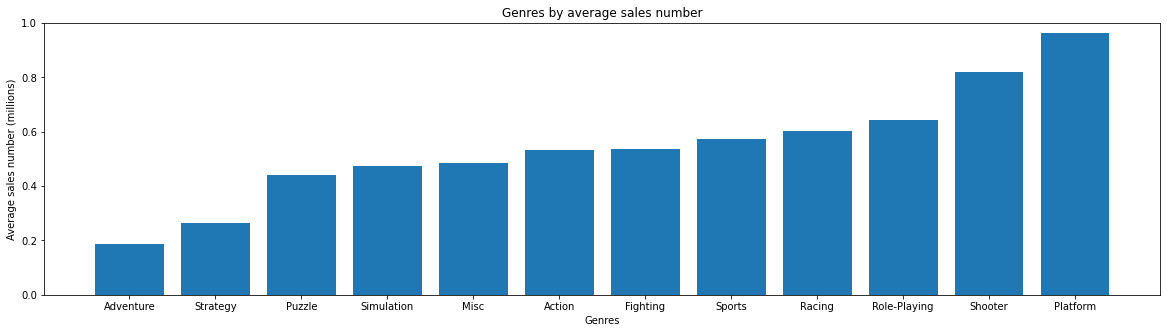

In [255]:
# Visulization
plt.figure(figsize=(20,5))
plt.bar(range(0,12),list(df_clean.groupby('Genre')['Global_Sales'].mean().sort_values().values),
        tick_label=list(df_clean.groupby('Genre')['Global_Sales'].mean().sort_values().index))
plt.title('Genres by average sales number')
plt.xlabel('Genres')
plt.ylabel('Average sales number (millions)');
plt.ylim(0,1);

<blockquote>Note: I can see that the top 5 genres by average high sales is 'Sports', 'Racing', 'Role-Playing', 'Shooter', 'Platform', and the top 1 Platform is twice as big as Sports' sales numbers.</blockquote>

### Research Question 2: What are top 5 Publisher of high sales?

In [256]:
# let's see the average Global_Sales by publishers
list_for_top5_values = list(df_clean.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:].values)
list_for_top5_index = list(df_clean.groupby('Publisher')['Global_Sales'].mean().sort_values()[-5:].index)

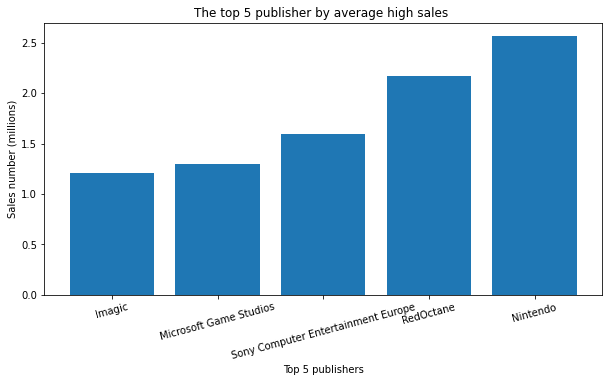

In [257]:
plt.figure(figsize=(10,5))
plt.bar([1,2,3,4,5],list_for_top5_values,
        tick_label=list_for_top5_index)
plt.title('The top 5 publisher by average high sales ')
plt.xlabel('Top 5 publishers')
plt.ylabel('Sales number (millions)');
plt.xticks(rotation=15);

<blockquote>Note: Top 5 genres by average high sales is 'Imagic', 'Microsoft Game Studios', 'Sony Computer Entertainment Europe', 'RedOctane', 'Nintendo'. Besides, Nintendo is twice as much as Microsoft Game Studios from 1980 to 2020.</blockquote>

### Research Question 3: What are top 5 Platform of high sales?

In [258]:
top_5_Platform =df_clean.groupby('Platform')['Global_Sales'].mean().sort_values()[-5:]

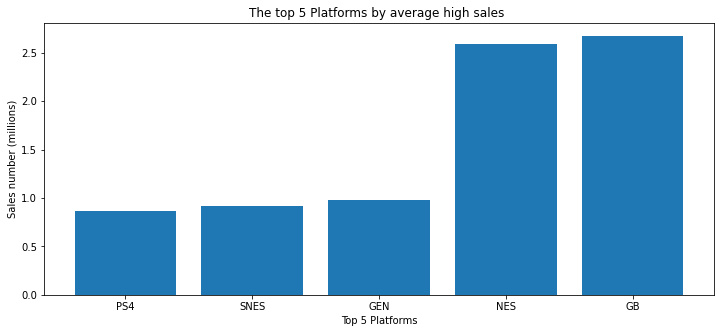

In [259]:
plt.figure(figsize=(12,5))
plt.bar([1,2,3,4,5],top_5_Platform.values,
        tick_label=top_5_Platform.index)
plt.title('The top 5 Platforms by average high sales ')
plt.xlabel('Top 5 Platforms')
plt.ylabel('Sales number (millions)');

<blockquote>Note: I can see that the top 5 genres by average high sales is 'PS4', 'SNES', 'GEN', 'NES', 'GB'. GB and NES are nearly 2.65 millions, which is almost 3 times as many as GEN</blockquote>

### Research Question 4: Which 5 year of range from 1980 - 2020 has the highest global sales?

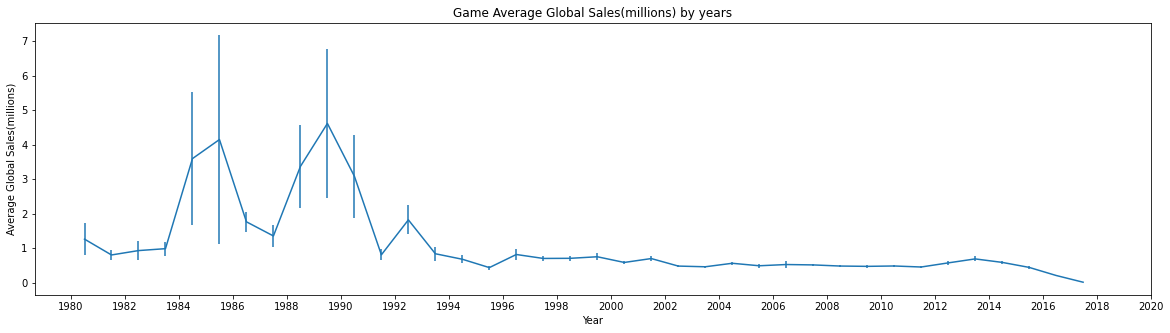

In [260]:
plt.figure(figsize=(20,5))
 
bin_size = 1
xbin_edges = np.arange(1980, df_clean['Year'].max()+1, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbin = pd.cut(df_clean['Year'], xbin_edges, right=False, include_lowest=True)
y_means = df_clean['Global_Sales'].groupby(data_xbin).mean()
y_sems = df_clean['Global_Sales'].groupby(data_xbin).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Year')
plt.ylabel('Average Global Sales(millions)');
plt.xticks(range(1980,2021,2), range(1980,2021,2));
plt.title('Game Average Global Sales(millions) by years');

<blockquote>Note: I found that global console video games sold the most during 1984 to 1992, around 3 millions at average, which is almost 3 times as many as the sales number in 2017.</blockquote>

### Research Question 5: What is the relationship between sales numbers in 4 different main regions from 1980 - 2020?

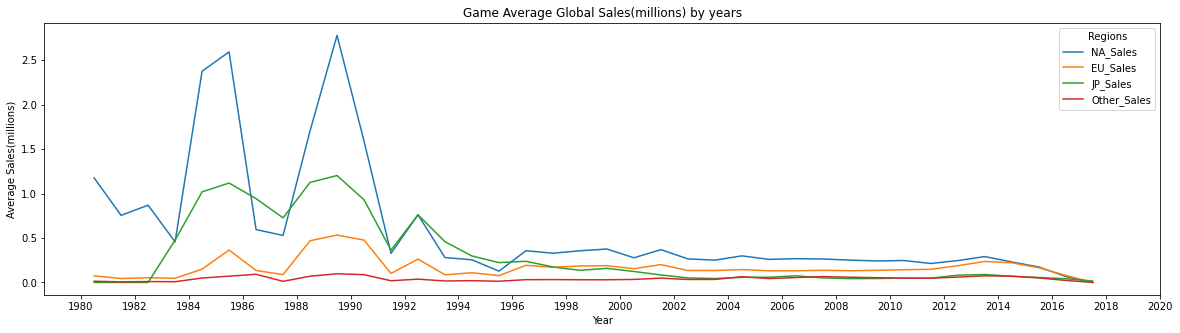

In [261]:
plt.figure(figsize=(20,5))
# set bin edges, compute centers
bin_size = 1
xbin_edges = np.arange(1980, df_clean['Year'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df_clean['Year'], xbin_edges, right = False, include_lowest = True)
y_means = df_clean['NA_Sales'].groupby(data_xbins).mean()
plt.errorbar(x = xbin_centers, y = y_means)
y_means = df_clean['EU_Sales'].groupby(data_xbins).mean()
plt.errorbar(x = xbin_centers, y = y_means)
y_means = df_clean['JP_Sales'].groupby(data_xbins).mean()
plt.errorbar(x = xbin_centers, y = y_means)
y_means = df_clean['Other_Sales'].groupby(data_xbins).mean()
plt.errorbar(x = xbin_centers, y = y_means)
# plot the summarized data
plt.xlabel('Year')
plt.ylabel('Average Sales(millions)');
plt.xticks(range(1980,2021,2), range(1980,2021,2));
plt.title('Game Average Global Sales(millions) by years');
plt.legend(title="Regions", labels=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']);

<blockquote>Note: North America have been sold more than most of the countries since 1980, but in the recent decade, every regions has been going down to near 0.25 millions at average due to the rising of mobile games.</blockquote>

### Research Question 6: What is the relation with Top 5 Platforms and years ?

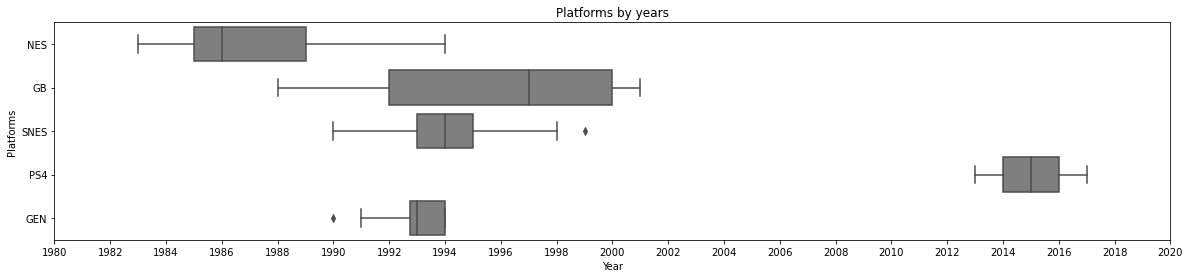

In [262]:
# Visualization
#I only need the data from top platform
Top5platform_df = df_clean[df_clean['Platform'].isin(['PS4', 'SNES', 'GEN', 'NES', 'GB'])]
plt.figure(figsize=(20,4))
base_color = sb.color_palette()[7]
sb.boxplot(data = Top5platform_df, x = 'Year', y = 'Platform', color = base_color)
plt.xlabel('Year')
plt.ylabel('Platforms');
plt.xticks(range(1980,2021,2), range(1980,2021,2));
plt.title('Platforms by years');

<blockquote>Note: I found there are 4 of top 5 platforms with high sales number happened before 2002, only one in the Top 5 (PS4), was popular after 2012.</blockquote>

### Research Question 7: Among "Top 5 Genres", "Top 5 Publisher", and "Top 5 Platform", which variable affected high global sales the most?

In [263]:
# import statmodel to analyze the relationship between independent variables and dependent variable.
import statsmodels.api as sm

In [264]:
df_new = df_clean.copy()

In [265]:
df_new.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [266]:
# convert the categorical variable into 0,1
df_new[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform(genre)', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']] = pd.get_dummies(df_clean['Genre'])

In [267]:
# convert the categorical variable into 0,1
df_new[['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT',
       'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']] = pd.get_dummies(df_clean['Platform'])

In [268]:
# there are too manu publishers in this dataset, so I decided to convert only top 5 publishers into 1,0
Nintendo_list = list(df_clean.query('Publisher == "Nintendo"').index)
RedOctane_list =list(df_clean.query('Publisher == "RedOctane"').index)
Sony_list =list(df_clean.query('Publisher == "Sony Computer Entertainment Europe"').index)
Microsoft_list =list(df_clean.query('Publisher == "Microsoft Game Studios"').index)
Imagic_list =list(df_clean.query('Publisher == "Imagic"').index)
df_new["Nintendo"] = 0
df_new["RedOctane"] = 0
df_new["Sony Computer Entertainment Europe"] = 0
df_new["Microsoft Game Studios"] = 0
df_new["Imagic"] = 0

In [269]:
# give the top 5 publishers columns 0,1
for i in Nintendo_list:
    df_new['Nintendo'][i:i+1] = 1
    
for i in RedOctane_list:
    df_new['RedOctane'][i:i+1] = 1
    
for i in Sony_list:
    df_new['Sony Computer Entertainment Europe'][i:i+1] = 1
    
for i in Microsoft_list:
    df_new['Microsoft Game Studios'][i:i+1] = 1
    
for i in Imagic_list:
    df_new['Imagic'][i:i+1] = 1

In [270]:
# use the Multiple Linear Regression model to analyze.
df_new['intercept'] = 1
lm = sm.OLS(df_new['Global_Sales'], df_new[['intercept',
                                            'Sports' ,'Racing', 'Role-Playing', 'Shooter','Platform(genre)',
                                            'PS4', 'SNES', 'GEN', 'NES', 'GB',
                                           'Imagic', 'Microsoft Game Studios',
                                            'Sony Computer Entertainment Europe', 'RedOctane', 'Nintendo']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     119.0
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:26:55   Log-Likelihood:                -28883.
No. Observations:               15797   AIC:                         5.780e+04
Df Residuals:                   15781   BIC:                         5.792e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                              0.3314      0.016     20.188      0.000       0.299       0.364
Sports                                 0.1095      0.036      3.082      0.002       0.040       0.179
Racing                                 0.1371      0.046      2.951      0.003       0.046       0.228
Role-Playing                           0.1446      0.043      3.360      0.001       0.060       0.229
Shooter                                0.3637      0.046      7.948      0.000       0.274       0.453
Platform(genre)                        0.3624      0.054      6.678      0.000       0.256       0.469
PS4                                    0.3093      0.085      3.619      0.000       0.142       0.477
SNES                                   0.2947      0.104      2.826      0.005       0.090       0.499
GEN                                    0.3293      0.308      1.069      0.285      -0.275       0.933
NES                                    1.7277      0.156     11.086      0.000       1.422       2.033
GB                                     1.8499      0.156     11.889      0.000       1.545       2.155
Imagic                                 0.8300      0.754      1.101      0.271      -0.647       2.307
Microsoft Game Studios                 0.8514      0.111      7.697      0.000       0.635       1.068
Sony Computer Entertainment Europe     0.9771      0.390      2.508      0.012       0.213       1.741
RedOctane                              1.7314      0.754      2.297      0.022       0.254       3.209
Nintendo                               2.0433      0.059     34.708      0.000       1.928       2.159
==============================================================================
Omnibus:                    32521.803   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        255408223.103
Skew:                          17.033   Prob(JB):                         0.00
Kurtosis:                     624.993   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
# visualize the coff of each categories of variables
# build a dataframe
d = {'coff': [0.83, 0.85,0.9771,1.7314,2.0433,0.3093, 0.2947,0.3293,1.7277,1.8499,0.1095, 0.1371, 0.1446, 0.3637, 0.3624], }
coff_df = pd.DataFrame(data=d)

In [272]:
coff_df

,coff
0,0.8300
1,0.8500
2,0.9771
3,1.7314
4,2.0433
5,0.3093
6,0.2947
7,0.3293
8,1.7277
9,1.8499


In [273]:
# give individual category names
coff_df['categories'] = " "
for i in range(0,5):
    coff_df[i:i+1]['categories']='Publisher'
for i in range(5,10):
    coff_df[i:i+1]['categories']='Platform'
for i in range(10,15):
    coff_df[i:i+1]['categories']='genre'

In [274]:
# give individual places names
coff_df['places'] = " "
for i in range(0,15,5):
    coff_df[i:i+1]['places']='Top5'
for i in range(1,15,5):
    coff_df[i:i+1]['places']='Top4'
for i in range(2,15,5):
    coff_df[i:i+1]['places']='Top3'
for i in range(3,15,5):
    coff_df[i:i+1]['places']='Top2'
for i in range(4,15,5):
    coff_df[i:i+1]['places']='Top1'

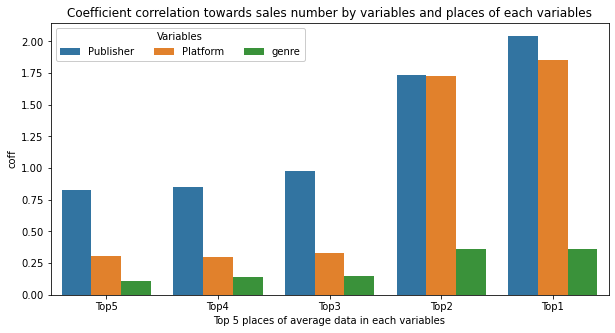

In [275]:
# Visualize
plt.figure(figsize=(10,5))
ax = sb.barplot(data = coff_df, x = 'places', y = 'coff', hue = 'categories')
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'Variables');
plt.title('Coefficient correlation towards sales number by variables and places of each variables')
plt.xlabel("Top 5 places of average data in each variables");

<blockquote>Note: I found that among Top 5 in platforms, publishers, and genres, generally Top 5 Publishers affects the global sales numbers the most, which is 6 times higher than Top 5 genres and 30% higher than Top 5 Platforms.</blockquote>

**Research Question 1: What are top 5 genres of high global sales?**

    The top 5 genres by average high sales is 'Sports', 'Racing', 'Role-Playing', 'Shooter', 'Platform', and the top 1 Platform is twice as big as Sports' sales numbers.
    
**Research Question 2: What are top 5 Publisher of high global sales?**

    Top 5 genres by average high sales is 'Imagic', 'Microsoft Game Studios', 'Sony Computer Entertainment Europe', 'RedOctane', 'Nintendo'. Besides, Nintendo is twice as much as Microsoft Game Studios from 1980 to 2020
**Research Question 3: What are top 5 Platform of high global sales?**

    Top 5 genres by average high sales is 'PS4', 'SNES', 'GEN', 'NES', 'GB'. GB and NES are nearly 2.65 millions, which is almost 3 times as many as GEN.
**Research Question 4: Which 5 year of range from 1980 - 2020 has the highest global sales?**

Global console video games sold the most during 1984 to 1992, around 3 millions at average, which is almost 3 times as many as the sales number in 2017.
**Research Question 5: What is the relationship between sales numbers in 4 different main regions from 1980 - 2020?**

    North America have been sold more than most of the countries since 1980, but in the recent decade, every regions has been going down to near 0.25 millions at average due to the rising of mobile games.
**Research Question 6: What is the relationship between Top 5 Platforms and years ?**

    There are 4 of top 5 platforms with high sales number happened before 2002, only one in the Top 5 (PS4), was popular after 2012.
**Research Question 7: Among "Gerne", "Publisher", "year", and "Platform", which variable affected high global sales the most?**

    Among Top 5 in platforms, publishers, and genres, Top 5 Publishers affects the global sales numbers the most, which is 6 times as many as Top 5 genres and 30% higher than Top 5 Platforms.